# BDA학회 데이터 분석 전처리 적용반 3주차 복습과제

제출자 성명: 이승섭89

3주차 코드를 재해석합니다.

Python 3.10.14 버전을 사용합니다.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2

In [2]:
# VarianceThreshold example code

X = [[0,2,0,3],
    [0,1,2,3],
    [0,1,1,5]] # dummy data

selector =VarianceThreshold(threshold=0.5) # Increase threshold to 0.5
X_high_variance =selector.fit_transform(X)

X_high_variance

array([[0, 3],
       [2, 3],
       [1, 5]])

In [3]:
# Chi-squared test example code

X = np.array([[1,2,3],
             [4,5,6],
             [7,8,9],
             [10,11,12]])
y = np.array([0,1,0,1]) # Categorical label dummy data (survival)

selector=SelectKBest(chi2, k=3) # Select top 3 features (all)
X_new_sel=selector.fit_transform(X,y)

X_new_sel

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [4]:
# Chi-squared test on Titanic dataset

# Load Titanic dataset using seaborn
titanic = sns.load_dataset('titanic')

# Fill missing values for continuous columns with the median and for categorical with mode
titanic.fillna({'age': titanic['age'].median(), 'embark_town': titanic['embark_town'].mode()[0], 'fare': titanic['fare'].median()}, inplace=True)

# Select features
X = titanic[['pclass', 'sex', 'age', 'fare', 'embark_town']]
y = titanic['survived']

# Bin continuous variables using qcut into 4 bins, and store them in new columns
X['age_binned'] = pd.qcut(X['age'], q=4, labels=False)
X['fare_binned'] = pd.qcut(X['fare'], q=4, labels=False)

# Drop the original 'age' and 'fare' columns as we now have binned versions
X = X.drop(['age', 'fare'], axis=1)

# Convert categorical variables to 'category' type instead of one-hot encoding
X['pclass'] = X['pclass'].astype('category')
X['sex'] = X['sex'].astype('category')
X['embark_town'] = X['embark_town'].astype('category')

# Convert categorical columns into codes (internally they are treated as integers)
X['pclass_cat'] = X['pclass'].cat.codes
X['sex_cat'] = X['sex'].cat.codes
X['embark_town_cat'] = X['embark_town'].cat.codes

# Drop the original categorical columns and keep only their numerical representations
X = X.drop(['pclass', 'sex', 'embark_town'], axis=1)

C:\Users\Max-PC\AppData\Local\Temp\ipykernel_26752\2670497149.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age_binned'] = pd.qcut(X['age'], q=4, labels=False)
C:\Users\Max-PC\AppData\Local\Temp\ipykernel_26752\2670497149.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['fare_binned'] = pd.qcut(X['fare'], q=4, labels=False)


In [5]:
# Chi-squared test for feature selection
chi_selector = SelectKBest(chi2, k='all')
X_selected_all = chi_selector.fit_transform(X, y)

In [6]:
# Get the chi-squared scores
chi_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': chi_selector.scores_
}).sort_values(by='Score', ascending=True)

chi_scores

,Feature,Score
0,age_binned,0.025779
4,embark_town_cat,10.202525
2,pclass_cat,54.465866
1,fare_binned,66.603196
3,sex_cat,92.702447


In [7]:
# Select the top 2 features with chi-squared test
chi_selector_top2 = SelectKBest(chi2, k=2)
X_selected_top2 = chi_selector_top2.fit_transform(X, y)

# Get the selected feature indices and scores
selected_indices = chi_selector_top2.get_support(indices=True)
selected_features = X.columns[selected_indices]
selected_scores = chi_selector.scores_[selected_indices]

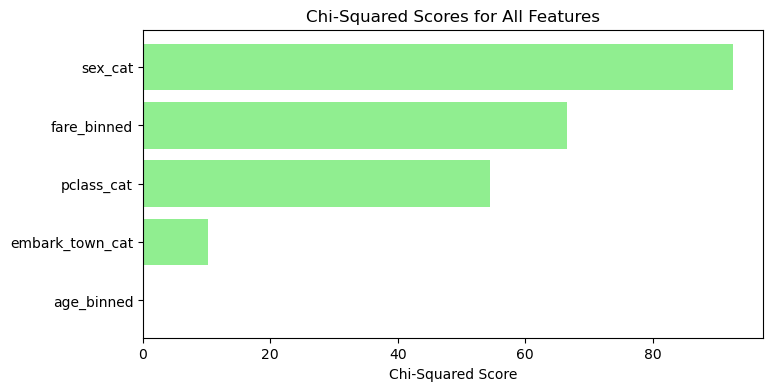

In [8]:
# Simple visualization for all features
plt.figure(figsize=(8, 4))
plt.barh(chi_scores['Feature'], chi_scores['Score'], color='lightgreen')
plt.xlabel('Chi-Squared Score')
plt.title('Chi-Squared Scores for All Features')
plt.show()

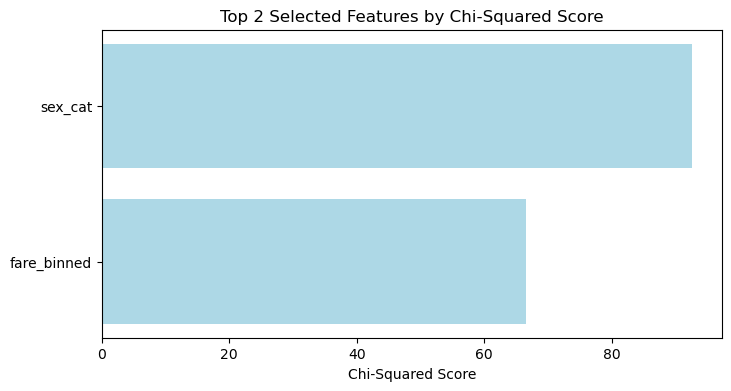

In [9]:
# Simple visualization for the top 2 selected features
plt.figure(figsize=(8, 4))
plt.barh(selected_features, selected_scores, color='lightblue')
plt.xlabel('Chi-Squared Score')
plt.title('Top 2 Selected Features by Chi-Squared Score')
plt.show()

In [ ]:
# Blank cell for running entire notebook.